# TSM Stock Analysis

# Fama French 3 Factor Model 

The Fama and French model has three factors: size of firms, book-to-market values and excess return on the market. In other words, the three factors used are SMB (small minus big), HML (high minus low) and the portfolio's return less the risk free rate of return. 

In [1]:
#Importing Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df_TSM = pd.read_csv ('data/TSM_fama3_new.csv')

In [3]:
df_TSM

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
0,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703,0.10,-0.15,0.25,0.000,11.899858,0.006290
1,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123,0.36,-0.64,-0.03,0.000,11.974703,0.003125
2,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448,0.76,-0.21,0.70,0.000,12.012123,0.006853
3,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090,-0.03,-0.16,0.23,0.000,12.094448,-0.005569
4,2012-10-08,15.840000,15.480000,15.840000,15.530000,12827100.0,11.622946,-0.36,-0.24,0.19,0.000,12.027090,-0.033603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2022-09-26,74.190002,72.919998,73.470001,73.010002,13441500.0,73.010002,-1.02,0.17,-0.75,0.009,73.870003,-0.011642
2512,2022-09-27,74.040001,72.349998,73.510002,73.029999,12430600.0,73.029999,-0.05,0.63,-0.93,0.009,73.010002,0.000274
2513,2022-09-28,72.290001,70.699997,71.110001,72.129997,12943600.0,72.129997,2.15,0.90,-0.33,0.009,73.029999,-0.012324
2514,2022-09-29,70.680000,68.480003,70.519997,69.279999,16120300.0,69.279999,-2.17,-0.46,0.86,0.009,72.129997,-0.039512


In [4]:
df_TSM.shape

(2516, 13)

 REGRESSION STATISTICS  

------------------------


 Joint significance of all coefficients
 [array([[1.31719061e-11]]), array([[1.]])]
Beta Values    
 [[ 0.00038906]
 [ 0.00982531]
 [ 0.00066304]
 [-0.00213244]]
P values       
 [[0.48912353 0.22559828 0.4889752  0.5499493 ]]
R-Square is       
 [[0.38244396]]
Adjusted R Square 
 [[0.38170643]]
Standard Error    
 [[0.01425516]]
Observations      
 2516
-------------------------



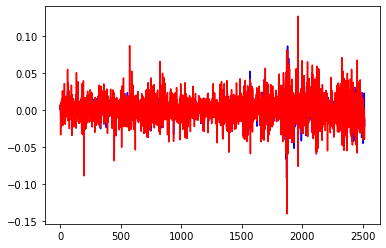

<AxesSubplot:title={'center':'Predictions using FF3 using Linear Regression'}>

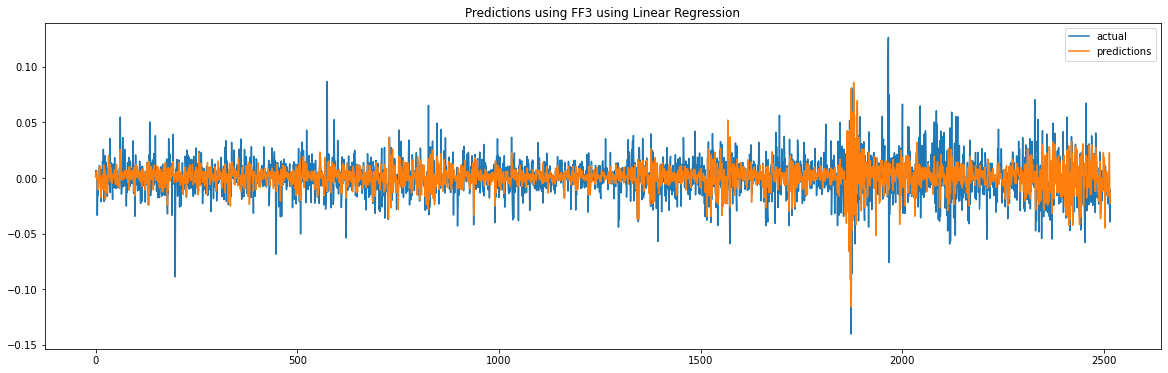

In [5]:
df_TSM['stock_return'] = (df_TSM['Adj Close']-df_TSM['Yest_Close'])/(df_TSM['Yest_Close'])

T = df_TSM.shape[0]
Y = df_TSM['stock_return'].values
columns = ['MktRF','SMB','HML']
X=df_TSM[columns]
X = np.column_stack([np.ones((len(X),1)),X])
N = X.shape
Y=np.asarray(Y)

Y = Y.reshape(T,1)

'REGRESSION STARTS:'       
'Linear Regression of Y: T x 1 on' 
'Regressors X: T x N'

invXX = np.linalg.inv(X.transpose()@X)

'OLS estimator beta: N x 1'

beta_hat = invXX@X.transpose()@Y
'Predictive value of Y_t using OLS'  

y_hat = X@beta_hat;       

'Residuals from OLS: Y - X*beta'        

residuals = Y - y_hat;            

'variance of Y_t or residuals'

sigma2 = (1/T)*(residuals.transpose()@residuals)

'standard deviation of Y_t or residuals'

sig = np.sqrt(sigma2) 

'variance-covariance matrix of beta_hat'
'N x N: on-diagnal variance(beta_j)'
'N x N: off-diagnal cov(beta_i, beta_j)'

varcov_beta_hat = (sigma2)*invXX
var_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

'Calculate R-square'

R_square = 1 - residuals.transpose()@residuals/(T*np.var(Y))

adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])


'Test Each Coefficient: beta_i'

't-test stat: N x 1'

t_stat = beta_hat.transpose()/var_beta_hat

' t-test significance level: N x 1'

p_val_t = 1-ss.norm.cdf(t_stat)

'Test of Joint Significance of Model'

F_stat = beta_hat.transpose()@varcov_beta_hat@beta_hat/\
         (residuals.transpose()@residuals)
'size: (1 x N)*(N x N)*(N x 1)/((1 x T) * (T x 1)) = 1 x 1'

p_val_F = 1-ss.f.cdf(F_stat,N[1]-1,T-N[1])


print(' REGRESSION STATISTICS  \n') 
print('------------------------\n')
print('\n Joint significance of all coefficients\n',[F_stat,p_val_F])
print('Beta Values    \n',beta_hat)
print('P values       \n',p_val_t)
print('R-Square is       \n',R_square)
print('Adjusted R Square \n',adj_R_square)
print('Standard Error    \n',sig)
print('Observations      \n',T) 
print('-------------------------\n')

plt.plot(y_hat, color='blue')
plt.plot(Y, color = 'red')
plt.show()
pred = pd.DataFrame(y_hat)
act = pd.DataFrame(Y)

plot_df = pd.DataFrame({"actual": act[0], "predictions": pred[0]})
plot_df.plot(figsize=(20, 6), title='Predictions using FF3 using Linear Regression')

In [6]:
mse = mean_squared_error(Y,y_hat)
rmse = np.sqrt(mse)
print('RMSE-------',rmse)
print('R-Squared--',r2_score(Y,y_hat))

RMSE------- 0.014255156515582955
R-Squared-- 0.3824439609753576
